# Proyek Analisis Data: Nama dataset
- Nama:
- Email:
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan setiap tahunnya ?
- Wilayah mana saja yang paling diminati oleh pelanggan dalam memesan ?
- Berapa lama rata-rata konsumen menyewa tempatnya ?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Tabel Calender**

In [3]:
calender = pd.read_csv('/content/drive/MyDrive/Data Scientist/Dataset Airbnb/Dataset/calendar.csv')
calender.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2023-09-04,f,$69.00,$69.00,3,1125
1,2818,2023-09-05,t,$69.00,$69.00,3,1125
2,2818,2023-09-06,f,$69.00,$69.00,3,1125
3,2818,2023-09-07,f,$69.00,$69.00,3,1125
4,2818,2023-09-08,f,$69.00,$69.00,3,1125


**Tabel Listing**

In [4]:
listings = pd.read_csv('/content/drive/MyDrive/Data Scientist/Dataset Airbnb/Dataset/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


**Tabel Neighbourhood**

In [5]:
neighbourhood = pd.read_csv('/content/drive/MyDrive/Data Scientist/Dataset Airbnb/Dataset/neighbourhoods.csv')
neighbourhood.head()

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost


**Tabel Review**

In [6]:
review = pd.read_csv('/content/drive/MyDrive/Data Scientist/Dataset Airbnb/Dataset/reviews.csv')
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


**Menghitung Jumlah Data**

In [7]:
print('Jumlah data pada Calender: ', len(calender.listing_id.unique()))
print('Jumlah data pada Listings: ', len(listings.id.unique()))
print('Jumlah data pada Review: ', len(review.listing_id.unique()))

Jumlah data pada Calender:  8386
Jumlah data pada Listings:  8386
Jumlah data pada Review:  7556


### Assessing Data

**Calendeer.Info**

In [8]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060891 entries, 0 to 3060890
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 163.5+ MB


**Melihat Mising Value**

In [9]:
calender.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

**Memeriksa Duplikasi**

In [10]:
print('Jumlah Duplikasi :', calender.duplicated().sum())

Jumlah Duplikasi : 0


**Memeriksa menggunakan Describe**

In [11]:
calender.describe()

,listing_id,minimum_nights,maximum_nights
count,3.060891e+06,3.060891e+06,3.060891e+06
mean,2.973883e+17,5.175883e+00,5.112676e+05
std,3.905586e+17,3.478759e+01,3.311463e+07
min,2.818000e+03,1.000000e+00,1.000000e+00
25%,1.851456e+07,2.000000e+00,2.500000e+01
50%,4.242412e+07,3.000000e+00,3.650000e+02
75%,7.229420e+17,4.000000e+00,1.125000e+03
max,9.722182e+17,1.001000e+03,2.147484e+09


**Listings.Info**

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8386 non-null   int64  
 1   listing_url                                   8386 non-null   object 
 2   scrape_id                                     8386 non-null   int64  
 3   last_scraped                                  8386 non-null   object 
 4   source                                        8386 non-null   object 
 5   name                                          8386 non-null   object 
 6   description                                   8385 non-null   object 
 7   neighborhood_overview                         5208 non-null   object 
 8   picture_url                                   8385 non-null   object 
 9   host_id                                       8386 non-null   i

**Melihat Missing Value**

In [13]:
listings.isna().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 75, dtype: int64

**Memeriksa Duplikasi**

In [14]:
print('Jumlah Duplikasi :', listings.duplicated().sum())

Jumlah Duplikasi : 0


**Memeriksa Menggunakan Describe**

In [15]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.386000e+03,8.386000e+03,8.386000e+03,8386.000000,8386.000000,0.0,8386.000000,8386.000000,8386.000000,0.0,...,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,8386.000000,8386.000000,8386.000000,8386.000000,7556.000000
mean,2.973884e+17,2.023090e+13,1.077878e+08,3.488433,6.217625,NaN,52.366603,4.889834,2.901741,NaN,...,4.765593,4.883518,4.899861,4.793811,4.638950,1.831624,1.103387,0.655617,0.031958,1.175696
std,3.905819e+17,0.000000e+00,1.448316e+08,26.562565,57.633911,NaN,0.017191,0.035403,1.328242,NaN,...,0.326993,0.228264,0.216565,0.259577,0.327927,2.857336,1.700376,1.990898,0.381666,2.253706
min,2.818000e+03,2.023090e+13,3.159000e+03,1.000000,1.000000,NaN,52.290340,4.755870,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.851464e+07,2.023090e+13,1.025536e+07,1.000000,1.000000,NaN,52.355640,4.865501,2.000000,NaN,...,4.670000,4.850000,4.880000,4.680000,4.500000,1.000000,1.000000,0.000000,0.000000,0.270000
50%,4.242761e+07,2.023090e+13,3.642318e+07,1.000000,1.000000,NaN,52.365769,4.887580,2.000000,NaN,...,4.860000,4.960000,4.990000,4.860000,4.690000,1.000000,1.000000,0.000000,0.000000,0.580000
75%,7.227894e+17,2.023090e+13,1.444334e+08,1.000000,3.000000,NaN,52.376440,4.908708,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,0.000000,0.000000,1.240000
max,9.722182e+17,2.023090e+13,5.349544e+08,672.000000,1555.000000,NaN,52.425159,5.026430,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,27.000000,16.000000,21.000000,8.000000,120.110000


**Review.Info**

In [16]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381041 entries, 0 to 381040
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     381041 non-null  int64 
 1   id             381041 non-null  int64 
 2   date           381041 non-null  object
 3   reviewer_id    381041 non-null  int64 
 4   reviewer_name  381041 non-null  object
 5   comments       381027 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.4+ MB


**Memeriksa Missing Value Review**

In [17]:
review.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         14
dtype: int64

**Memeriksa Duplikasi**

In [18]:
print('Jumlah Duplikasi :', review.duplicated().sum())

Jumlah Duplikasi : 0


**Memeriksa Menggunakan Describe**

In [19]:
review.describe()

,listing_id,id,reviewer_id
count,3.810410e+05,3.810410e+05,3.810410e+05
mean,3.870153e+16,3.141503e+17,1.369009e+08
std,1.643068e+17,3.752851e+17,1.368669e+08
min,2.818000e+03,1.191000e+03,2.990000e+02
25%,4.295087e+06,2.514749e+08,2.865549e+07
50%,1.578052e+07,5.845232e+08,8.641518e+07
75%,3.076244e+07,6.954056e+17,2.058318e+08
max,9.642979e+17,9.723761e+17,5.339679e+08


### Cleaning Data

**Melihat Missing Value Listings**

In [20]:
listings.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 75, dtype: int64

In [21]:
Missing_Listings=listings.isnull().sum()

print("Daftar Missing Value:")
print(Missing_Listings[Missing_Listings > 0])

Daftar Missing Value:
description                        1
neighborhood_overview           3178
picture_url                        1
host_location                    924
host_about                      3739
host_response_time              2278
host_response_rate              2278
host_acceptance_rate            1226
host_is_superhost                 70
host_neighbourhood              5342
neighbourhood                   3178
neighbourhood_group_cleansed    8386
bathrooms                       8386
bathrooms_text                     7
bedrooms                        1428
beds                              73
calendar_updated                8386
first_review                     830
last_review                      830
review_scores_rating             830
review_scores_accuracy           834
review_scores_cleanliness        834
review_scores_checkin            834
review_scores_communication      834
review_scores_location           834
review_scores_value              834
license         

Melihat Missing value pada description

In [22]:
listings[listings.description.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3284,31254005,https://www.airbnb.com/rooms/31254005,20230903194145,2023-09-03,city scrape,Chalet in Badhoevedorp · ★4.81 · 1 bedroom · 1...,NaN,Badhoevedorp is located on the new lake on the...,https://a0.muscache.com/pictures/373a8ae9-f977...,233838549,...,4.96,4.69,4.69,NaN,f,1,1,0,0,1.37


Mengisi Missing Value Description

In [23]:
listings['description'].fillna('Information not available', inplace=True)

Melihat Missing Value pada picture_url

In [24]:
listings[listings.picture_url.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8235,954412257062869768,https://www.airbnb.com/rooms/954412257062869768,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 4 bedrooms · 4 beds...,"A unique, completely newly built 3-storey town...",NaN,NaN,345804656,...,NaN,NaN,NaN,UAKK 4893 TR23 35HH Z1U8,t,1,1,0,0,NaN


Mengisi Missing Value picture_url

In [25]:
listings['picture_url'].fillna('Link not available', inplace=True)

Melihat Missing Value pada neighborhood_overview

In [26]:
listings[listings.neighborhood_overview.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,775655,https://www.airbnb.com/rooms/775655,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.60 · 1 bedroom ·...,<b>The space</b><br />Appartment comprises Roo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4091515,...,4.78,4.93,4.49,0363 E246 20B0 E608 BF76,t,2,0,2,0,3.54
7,1086763,https://www.airbnb.com/rooms/1086763,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.78 · 1 bed...,Nestled right in between Amsterdam’s prettiest...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3899684,...,4.73,4.93,4.59,0363 3D40 C88D 9D23 A70E,t,4,0,4,0,0.38
17,50523,https://www.airbnb.com/rooms/50523,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.88 · 1 bed...,B & B “De 9 Straatjes” welcomes you to your ‘h...,NaN,https://a0.muscache.com/pictures/290179/a6be90...,231946,...,4.83,4.94,4.84,0363 22DC 0E52 B70B 0FB8,f,1,0,1,0,2.74
22,80635,https://www.airbnb.com/rooms/80635,20230903194145,2023-09-04,previous scrape,Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...,"Superlocated on the canal, 5 min's Walk from c...",NaN,https://a0.muscache.com/pictures/2da32e98-8c3a...,436145,...,4.79,4.95,4.57,0363 4108 6EC3 C2FF 2493,f,4,0,4,0,1.59
25,97221,https://www.airbnb.com/rooms/97221,20230903194145,2023-09-03,city scrape,Bed and breakfast in Amsterdam · ★4.63 · 1 bed...,"Private room offered in elegant furnished, cle...",NaN,https://a0.muscache.com/pictures/23266196/4d20...,195859,...,4.77,4.38,4.50,0363 BCBA 6311 3268 DC8C,f,2,0,2,0,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,970893501137233946,https://www.airbnb.com/rooms/970893501137233946,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...,Centraal gelegen 1 slaapkamer appartement met ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6582036,...,NaN,NaN,NaN,0363 78B2 E928 0AAC 4B42,f,1,1,0,0,NaN
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Mengisi Missing value neighborhood_overview

In [27]:
listings['neighborhood_overview'].fillna('Overview not available', inplace=True)

Melihat Missing Value pada host_location

In [28]:
listings[listings.host_location.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
264,1234387,https://www.airbnb.com/rooms/1234387,20230903194145,2023-09-04,previous scrape,Home in Amsterdam · ★New · 5 bedrooms · 8 beds...,Spacious family house in the center of Amsterd...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,2311301,...,5.00,5.00,4.00,0363 C497 3975 0635 DF4D,f,1,1,0,0,1.00
492,2754846,https://www.airbnb.com/rooms/2754846,20230903194145,2023-09-04,previous scrape,Condo in Amsterdam · ★4.67 · 1 bedroom · 1 bed...,"Modern, comfortable appartement for 2 people w...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,13885350,...,4.89,4.67,4.56,0363 8760 72FA 6481 6A9B,f,1,1,0,0,0.77
558,3254077,https://www.airbnb.com/rooms/3254077,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.92 · 1 bedroom ·...,My apartment is only for couples who want to e...,‘Baarsjes’ area and Amsterdam<br />The neighbo...,https://a0.muscache.com/pictures/bc3037d8-6ad0...,7780586,...,4.89,4.59,4.73,036314CF9C6086A2532C,f,1,1,0,0,0.35
636,3879930,https://www.airbnb.com/rooms/3879930,20230903194145,2023-09-04,city scrape,Home in Amsterdam · ★4.90 · 3 bedrooms · 3 bed...,"Spacious open, loft-style family apartment in ...",Multi cultural neighborhood in upcoming and po...,https://a0.muscache.com/pictures/15d566a0-d615...,20056287,...,4.94,4.65,4.73,0363 1FF6 2D5D AA70 932C,f,1,1,0,0,0.58
873,5950879,https://www.airbnb.com/rooms/5950879,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · ★4.92 · 2 bedrooms · 2 be...,Welcome to Amsterdam! If you are looking for a...,Overview not available,https://a0.muscache.com/pictures/ca95c01f-970d...,211997810,...,4.92,4.70,4.76,0363 76BB 11A0 7FBF D35E,f,1,1,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,967253542428070875,https://www.airbnb.com/rooms/967253542428070875,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,"The apartment is spacious, renovated and in a ...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,59616806,...,NaN,NaN,NaN,0363 A0C4 30FB C8A8 0611,f,1,1,0,0,NaN
8363,968009818583806196,https://www.airbnb.com/rooms/968009818583806196,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Step into Amsterdam apartment adorned with stu...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534149860,...,NaN,NaN,NaN,UHNI 5369 BH64 82RH A5U2,t,1,1,0,0,NaN
8365,968203403339639631,https://www.airbnb.com/rooms/968203403339639631,20230903194145,2023-09-04,city scrape,Home in Amsterdam · ★New · 4 bedrooms · 4 beds...,"This exclusive, premium full canal house, outf...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534378749,...,NaN,NaN,NaN,0363 0CF8 8FC4 B932 DA4D,f,1,1,0,0,NaN
8373,969990487352720238,https://www.airbnb.com/rooms/969990487352720238,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Welcome to my modern house. The apartment is l...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534779437,...,NaN,NaN,NaN,0363 3E34 C655 BF60 2F07,f,1,1,0,0,NaN


Menghitung Jumlah Missing Value untuk katogorikal Host Location

In [29]:
listings.host_location.value_counts()

Amsterdam, Netherlands     6866
Netherlands                 253
London, United Kingdom       20
Amstelveen, Netherlands      16
Utrecht, Netherlands         15
                           ... 
Los Angeles, CA               1
Istanbul, Turkey              1
Bertrange, Luxembourg         1
Budapest, Hungary             1
Ezor Tel Aviv, Israel         1
Name: host_location, Length: 167, dtype: int64

Mengisi Missing value host_location dengan Amsterdam, Netherlands karena memiliki jumlah yang dominan

In [30]:
listings['host_location'].fillna('Amsterdam, Netherlands', inplace=True)

Melihat Missing Value pada host_about

In [31]:
listings[listings.host_about.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,48373,https://www.airbnb.com/rooms/48373,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 2 bedrooms · 2 beds...,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,220434,...,5.00,5.00,5.00,0363 4A2B A6AD 0196 F684,f,1,1,0,0,0.67
58,307497,https://www.airbnb.com/rooms/307497,20230903194145,2023-09-04,previous scrape,Boat in Amsterdam · ★4.86 · 10 bedrooms · 26 b...,Unique once in a lifetime experience!<br /><br...,Amsterdam (Pontsteiger) - From the northern Po...,https://a0.muscache.com/pictures/miso/Hosting-...,176944339,...,4.88,4.59,4.48,Exempt,f,2,2,0,0,0.82
75,440992,https://www.airbnb.com/rooms/440992,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.88 · 2 bedrooms · 2 bed...,/<br /><br /><b>The space</b><br />Our sunny a...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,2191136,...,4.89,4.67,4.71,0363 6532 4C0A A235 9114,f,1,1,0,0,0.93
80,483779,https://www.airbnb.com/rooms/483779,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.88 · 2 bedrooms ...,"Studio with living room/bedroom, dining and ki...","Apartment building is located in a modern, spa...",https://a0.muscache.com/pictures/134fcae1-dbff...,2395278,...,4.97,4.38,4.82,0363 0306 F66C F808 A78D,f,1,0,1,0,0.44
89,528022,https://www.airbnb.com/rooms/528022,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.86 · 1 bedroom · 1 bed ...,Highlights<br />*Located only 5 minutes from C...,Overview not available,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,...,4.89,4.78,4.73,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,970909711850366242,https://www.airbnb.com/rooms/970909711850366242,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Wie bieden ons fijne en rustige familie appart...,De pijp is de “place to be”. Hotspot met alle ...,https://a0.muscache.com/pictures/hosting/Hosti...,95651453,...,NaN,NaN,NaN,0363 34A1 5062 7E65 423C,f,1,1,0,0,NaN
8380,970939750211583641,https://www.airbnb.com/rooms/970939750211583641,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Mooi en licht appartement in de gezellige Tran...,"In de .buurt zijn veel restaurants, bars en ko...",https://a0.muscache.com/pictures/miso/Hosting-...,14548042,...,NaN,NaN,NaN,0363 C600 DE20 989A 12A2,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN


Mengisi Missing Value host_about

In [32]:
listings['host_about'].fillna('Host About not available', inplace=True)

Melihat Missing Value pada host_response_time

In [33]:
listings[listings.host_response_time.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
13,44391,https://www.airbnb.com/rooms/44391,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.72 · 2 bedrooms ...,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.28
19,55709,https://www.airbnb.com/rooms/55709,20230903194145,2023-09-03,city scrape,Loft in Amsterdam · ★4.95 · 1 bedroom · 1 bed ...,"<b>The space</b><br />Charming, bright loft on...","The apartment is situated in a small, quiet, o...",https://a0.muscache.com/pictures/14896636/c266...,263233,...,4.98,4.92,4.80,0363 E295 7D15 8420 343E,f,1,1,0,0,0.43
21,62015,https://www.airbnb.com/rooms/62015,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.91 · 1 bedroom ·...,This beautiful apartment in one of the most li...,In this neighborhood is a lot to do: lots of c...,https://a0.muscache.com/pictures/e6cb417b-6d76...,301340,...,4.94,4.68,4.59,0363 B090 499C D757 7F4F,f,1,1,0,0,0.23
22,80635,https://www.airbnb.com/rooms/80635,20230903194145,2023-09-04,previous scrape,Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...,"Superlocated on the canal, 5 min's Walk from c...",Overview not available,https://a0.muscache.com/pictures/2da32e98-8c3a...,436145,...,4.79,4.95,4.57,0363 4108 6EC3 C2FF 2493,f,4,0,4,0,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,970787450560770648,https://www.airbnb.com/rooms/970787450560770648,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Comfortable, fully-renovated, stylish, non-smo...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534954417,...,NaN,NaN,NaN,0363 7D0C 430E 8412 64C5,f,1,1,0,0,NaN
8379,970909711850366242,https://www.airbnb.com/rooms/970909711850366242,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Wie bieden ons fijne en rustige familie appart...,De pijp is de “place to be”. Hotspot met alle ...,https://a0.muscache.com/pictures/hosting/Hosti...,95651453,...,NaN,NaN,NaN,0363 34A1 5062 7E65 423C,f,1,1,0,0,NaN
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN


Menghitung Jumlah Misisng Value untuk kategorikal host_response_time

In [34]:
listings.host_response_time.value_counts()

within an hour        3122
within a few hours    1530
within a day          1290
a few days or more     166
Name: host_response_time, dtype: int64

Mengisi Missing value host_response_time dengan within an hour, Netherlands karena memiliki jumlah yang dominan

In [35]:
listings['host_response_time'].fillna('within an hour', inplace=True)

Melihat Missing value pada host_response_rate

In [36]:
listings[listings.host_response_rate.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
13,44391,https://www.airbnb.com/rooms/44391,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.72 · 2 bedrooms ...,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.28
19,55709,https://www.airbnb.com/rooms/55709,20230903194145,2023-09-03,city scrape,Loft in Amsterdam · ★4.95 · 1 bedroom · 1 bed ...,"<b>The space</b><br />Charming, bright loft on...","The apartment is situated in a small, quiet, o...",https://a0.muscache.com/pictures/14896636/c266...,263233,...,4.98,4.92,4.80,0363 E295 7D15 8420 343E,f,1,1,0,0,0.43
21,62015,https://www.airbnb.com/rooms/62015,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.91 · 1 bedroom ·...,This beautiful apartment in one of the most li...,In this neighborhood is a lot to do: lots of c...,https://a0.muscache.com/pictures/e6cb417b-6d76...,301340,...,4.94,4.68,4.59,0363 B090 499C D757 7F4F,f,1,1,0,0,0.23
22,80635,https://www.airbnb.com/rooms/80635,20230903194145,2023-09-04,previous scrape,Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...,"Superlocated on the canal, 5 min's Walk from c...",Overview not available,https://a0.muscache.com/pictures/2da32e98-8c3a...,436145,...,4.79,4.95,4.57,0363 4108 6EC3 C2FF 2493,f,4,0,4,0,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,970787450560770648,https://www.airbnb.com/rooms/970787450560770648,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Comfortable, fully-renovated, stylish, non-smo...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534954417,...,NaN,NaN,NaN,0363 7D0C 430E 8412 64C5,f,1,1,0,0,NaN
8379,970909711850366242,https://www.airbnb.com/rooms/970909711850366242,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Wie bieden ons fijne en rustige familie appart...,De pijp is de “place to be”. Hotspot met alle ...,https://a0.muscache.com/pictures/hosting/Hosti...,95651453,...,NaN,NaN,NaN,0363 34A1 5062 7E65 423C,f,1,1,0,0,NaN
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN


Menghitung Jumlah Misisng Value untuk kategorikal host_response_rate

In [37]:
listings.host_response_rate.value_counts()

100%    4815
90%      175
80%      114
0%        85
50%       80
97%       68
67%       57
75%       57
96%       52
89%       44
83%       41
98%       39
60%       36
78%       35
70%       34
94%       34
99%       32
88%       28
86%       26
93%       25
95%       24
92%       23
40%       19
91%       18
33%       17
82%       14
71%       10
64%        9
25%        9
57%        8
63%        7
85%        7
79%        7
87%        6
20%        5
56%        4
17%        4
69%        4
30%        4
43%        4
55%        3
10%        3
44%        3
62%        2
81%        2
36%        2
11%        2
7%         2
13%        1
73%        1
9%         1
47%        1
12%        1
45%        1
39%        1
53%        1
72%        1
Name: host_response_rate, dtype: int64

Mengisi Missing Value host_response_rate dengan 100%, karena memiliki value yang dominan

In [38]:
listings['host_response_rate'].fillna(value="100%",inplace=True)

Melihat Missing Value pada host_acceptance_rate

In [39]:
listings[listings.host_acceptance_rate.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13,44391,https://www.airbnb.com/rooms/44391,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.72 · 2 bedrooms ...,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.28
28,155548,https://www.airbnb.com/rooms/155548,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,Stay in one of the most vibrant neighborhoods ...,Overview not available,https://a0.muscache.com/pictures/1044450/d99b2...,748161,...,4.86,4.33,4.52,0363 A562 4D7E 4A91 60DF,f,1,1,0,0,0.14
32,171054,https://www.airbnb.com/rooms/171054,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.75 · 2 bedrooms ...,Popular neighbourhood close to the city's cent...,The neighborhood is getting more popular every...,https://a0.muscache.com/pictures/a250ad44-1310...,815989,...,4.97,4.73,4.75,0363 BDF7 C0EC 9B88 DECA,f,1,1,0,0,0.70
39,214531,https://www.airbnb.com/rooms/214531,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.82 · 1 bedroom ·...,Just 1 minute from the Damsquare in Amsterdam ...,"The small guesthouse is very central situated,...",https://a0.muscache.com/pictures/de8639df-d73c...,1107389,...,4.84,4.89,4.74,0363 1939 7BED DDCD 0353,f,1,0,1,0,1.22
45,254800,https://www.airbnb.com/rooms/254800,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.94 · 1 bedroom ·...,Great place to stay in the middle of the city ...,It's only a 5 minute walk to the Ann Frank Hou...,https://a0.muscache.com/pictures/6f2f04a4-b6c1...,1337537,...,4.94,5.00,4.67,0363 7E3F 1742 B05C 9E62,f,1,1,0,0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,970787450560770648,https://www.airbnb.com/rooms/970787450560770648,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Comfortable, fully-renovated, stylish, non-smo...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,534954417,...,NaN,NaN,NaN,0363 7D0C 430E 8412 64C5,f,1,1,0,0,NaN
8379,970909711850366242,https://www.airbnb.com/rooms/970909711850366242,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Wie bieden ons fijne en rustige familie appart...,De pijp is de “place to be”. Hotspot met alle ...,https://a0.muscache.com/pictures/hosting/Hosti...,95651453,...,NaN,NaN,NaN,0363 34A1 5062 7E65 423C,f,1,1,0,0,NaN
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN


Mengitung Jumlah Missing Value untuk kategorikal host_acceptance_rate

In [40]:
listings.host_acceptance_rate.value_counts()

100%    2544
99%      321
50%      304
0%       238
67%      231
        ... 
3%         2
4%         2
9%         2
5%         1
49%        1
Name: host_acceptance_rate, Length: 99, dtype: int64

Mengisi Missing value host_acceptance_rate dengan 100%, karena memiliki nilai yang dominan

In [41]:
listings['host_acceptance_rate'].fillna('100%', inplace=True)

Melihat Missing value pada host_is_superhost

In [42]:
listings[listings.host_is_superhost.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
42,245927,https://www.airbnb.com/rooms/245927,20230903194145,2023-09-04,city scrape,Guest suite in Amsterdam · ★4.85 · 2 bedrooms ...,This unique property is a 16th century canal h...,The view from the apartment of the most beauti...,https://a0.muscache.com/pictures/5a410698-dd67...,1005087,...,4.89,4.98,4.66,0363 E3FA A6F6 2112 7636,t,1,1,0,0,1.39
122,679838,https://www.airbnb.com/rooms/679838,20230903194145,2023-09-04,previous scrape,Condo in Amsterdam · ★4.95 · 1 bedroom · 1 bed...,Welcome! <br /><br />You will be staying in a ...,Overview not available,https://a0.muscache.com/pictures/9366842/cd367...,22642887,...,5.00,4.96,4.75,0363 0B70 756D 626C F77C,f,1,1,0,0,0.52
265,1236227,https://www.airbnb.com/rooms/1236227,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.95 · 2 bedrooms ...,In the middle of the centre of Amsterdam and v...,You are in the epic centre of Amsterdam<br />E...,https://a0.muscache.com/pictures/miso/Hosting-...,6739792,...,4.96,4.97,4.83,0363 CF0D F533 8862 D059,t,1,1,0,0,2.32
791,5178549,https://www.airbnb.com/rooms/5178549,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★5.0 · 2 bedrooms ·...,A bright tranquil apartment located on the gro...,"It's a great neighborhood, because you can wal...",https://a0.muscache.com/pictures/65370267/39be...,46691672,...,5.00,5.00,4.67,0363 8389 5F78 A152 C8C0,f,17,16,1,0,3.00
792,5184303,https://www.airbnb.com/rooms/5184303,20230903194145,2023-09-04,city scrape,Loft in Amsterdam · ★4.90 · 1 bedroom · 3 beds...,Beautiful and Central loft with privet bathroo...,Jordaan,https://a0.muscache.com/pictures/106121494/559...,219080,...,4.94,4.83,4.71,0363 AA73 5D4D 7B17 9C6D,t,1,0,1,0,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,882495316549710669,https://www.airbnb.com/rooms/882495316549710669,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,Cozy apartment in the middle of the pijp with ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,393885963,...,5.00,5.00,4.75,0363 6D7F 4C46 B422 B658,f,1,1,0,0,1.29
7401,886216157563742390,https://www.airbnb.com/rooms/886216157563742390,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★5.0 · 2 bedrooms ·...,Experience the best of Amsterdam during your s...,"On the ground floor, you will find two beautif...",https://a0.muscache.com/pictures/miso/Hosting-...,7945947,...,5.00,5.00,5.00,0478 FCDE H4JF 3BF4 B06J,f,2,2,0,0,1.08
7657,908551939981627169,https://www.airbnb.com/rooms/908551939981627169,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.87 · 2 bedrooms ...,This perfectly located 45m² 2 Bedroom B&B apar...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,15976351,...,4.93,5.00,4.80,0363 9B65 744D D8F5 D59E,t,1,1,0,0,6.62
7693,912256166055354484,https://www.airbnb.com/rooms/912256166055354484,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 4 bedrooms · 4 beds · 1 bath,Deze centraal gelegen accommodatie is uiterst ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,155931451,...,NaN,NaN,NaN,0363 A30A 2189 1CB9 D58C,f,1,1,0,0,NaN


Menghitung Jumlah Missing Value untuk kategorikal host_is_superhost

In [43]:
listings.host_is_superhost.value_counts()

f    6714
t    1602
Name: host_is_superhost, dtype: int64

Mengisi Missing value host_is_superhost dengan ***f***, Netherlands karena memiliki jumlah yang dominan

In [44]:
listings['host_is_superhost'].fillna('f', inplace=True)

Melihat Missing Value pada host_neighbourhood

In [45]:
listings[listings.host_neighbourhood.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
41,222516,https://www.airbnb.com/rooms/222516,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.71 · 1 bedroom ·...,Feel at home in Amsterdam.<br /><br />This apa...,"It's vibrant, really up and coming and very we...",https://a0.muscache.com/pictures/miso/Hosting-...,1155595,...,4.88,4.55,4.54,0363 6ADC 900E 6878 AC7C,f,1,1,0,0,0.97
58,307497,https://www.airbnb.com/rooms/307497,20230903194145,2023-09-04,previous scrape,Boat in Amsterdam · ★4.86 · 10 bedrooms · 26 b...,Unique once in a lifetime experience!<br /><br...,Amsterdam (Pontsteiger) - From the northern Po...,https://a0.muscache.com/pictures/miso/Hosting-...,176944339,...,4.88,4.59,4.48,Exempt,f,2,2,0,0,0.82
70,379885,https://www.airbnb.com/rooms/379885,20230903194145,2023-09-03,city scrape,Houseboat in Watergraafsmeer · ★4.68 · 1 bedro...,This is a romantic houseboat-experience and an...,The Ark is located at the Weesperzijde one of ...,https://a0.muscache.com/pictures/e66b13a8-57b5...,1907015,...,4.60,4.85,4.45,0363 3FE4 07B5 85AA 55F8,t,1,0,1,0,0.71
84,515088,https://www.airbnb.com/rooms/515088,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · 1 bedroom · 2 beds · 1.5 ...,Our charming suite with sitting/sleeping area ...,Ransdorp is one of the most authentic places i...,https://a0.muscache.com/pictures/6185726/74520...,2536879,...,5.00,4.00,4.00,0363 0A94 AAA2 B228 0695,f,1,1,0,0,0.03
100,582028,https://www.airbnb.com/rooms/582028,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.75 · 1 bedroom ·...,Want to enjoy the vibrant city of Amsterdam an...,Overview not available,https://a0.muscache.com/pictures/f506dd7f-d4d4...,2865851,...,5.00,4.33,4.42,0363 6AE3 C6BD AA79 AB13,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung jumlah Missing Value untuk kategorikal host_neighbourhood

In [46]:
listings.host_neighbourhood.value_counts()

Oud-West             556
Grachtengordel       262
De Pijp              227
Jordaan              195
Oosterparkbuurt      158
                    ... 
Zona 6                 1
Palermo Hollywood      1
Cannaregio             1
Nieuwendammerham       1
Brockley               1
Name: host_neighbourhood, Length: 66, dtype: int64

Mengisi Missing Value host_neighbourhood dengan Oud_West, karena memiliki jumlah yang dominan

In [47]:
listings['host_neighbourhood'].fillna('Oud-West', inplace=True)

Melihat Missing Value pada neighbourhood

In [48]:
listings[listings.neighbourhood.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,775655,https://www.airbnb.com/rooms/775655,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.60 · 1 bedroom ·...,<b>The space</b><br />Appartment comprises Roo...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,4091515,...,4.78,4.93,4.49,0363 E246 20B0 E608 BF76,t,2,0,2,0,3.54
7,1086763,https://www.airbnb.com/rooms/1086763,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.78 · 1 bed...,Nestled right in between Amsterdam’s prettiest...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,3899684,...,4.73,4.93,4.59,0363 3D40 C88D 9D23 A70E,t,4,0,4,0,0.38
17,50523,https://www.airbnb.com/rooms/50523,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.88 · 1 bed...,B & B “De 9 Straatjes” welcomes you to your ‘h...,Overview not available,https://a0.muscache.com/pictures/290179/a6be90...,231946,...,4.83,4.94,4.84,0363 22DC 0E52 B70B 0FB8,f,1,0,1,0,2.74
22,80635,https://www.airbnb.com/rooms/80635,20230903194145,2023-09-04,previous scrape,Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...,"Superlocated on the canal, 5 min's Walk from c...",Overview not available,https://a0.muscache.com/pictures/2da32e98-8c3a...,436145,...,4.79,4.95,4.57,0363 4108 6EC3 C2FF 2493,f,4,0,4,0,1.59
25,97221,https://www.airbnb.com/rooms/97221,20230903194145,2023-09-03,city scrape,Bed and breakfast in Amsterdam · ★4.63 · 1 bed...,"Private room offered in elegant furnished, cle...",Overview not available,https://a0.muscache.com/pictures/23266196/4d20...,195859,...,4.77,4.38,4.50,0363 BCBA 6311 3268 DC8C,f,2,0,2,0,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,970893501137233946,https://www.airbnb.com/rooms/970893501137233946,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...,Centraal gelegen 1 slaapkamer appartement met ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6582036,...,NaN,NaN,NaN,0363 78B2 E928 0AAC 4B42,f,1,1,0,0,NaN
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung Jumlah Missing Value untuk kategorikal neighbourhood

In [49]:
listings.neighbourhood.value_counts()

Amsterdam, Noord-Holland, Netherlands                          4327
Amsterdam, North Holland, Netherlands                           531
Amsterdam, NH, Netherlands                                      195
Amsterdam, Netherlands                                           52
Amsterdam-Zuidoost, Noord-Holland, Netherlands                   15
Amsterdam, Nord Holland, Netherlands                             14
Amsterdam, Noord Holland, Netherlands                             9
Amsterdam-Zuidoost, North Holland, Netherlands                    8
Amsterdam, LC, Netherlands                                        6
Amsterdam Zuid-Oost, Noord-Holland, Netherlands                   3
Duivendrecht, Noord-Holland, Netherlands                          2
TC Amsterdam, Netherlands                                         2
Badhoevedorp, Noord-Holland, Netherlands                          2
LL Amsterdam, Netherlands                                         2
Netherlands                                     

Mengisi Missing Value neighbourhood dengan Amsterdam, Noord-Holland, Netherland,karena memiliki jumlah dominan

In [50]:
listings['neighbourhood'].fillna('Amsterdam, Noord-Holland, Netherland', inplace=True)

Melihat Missing Value pada neighbourhood_group_cleansed

In [51]:
listings[listings.neighbourhood_group_cleansed.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghapus kolom neighbourhood_group_cleansed, kolom ini dihapus karena valuenya kosong dari awal sampai akhir

In [52]:
listings.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

Melihat Missing Value pada bathrooms

In [53]:
listings[listings.bathrooms.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghapus kolom bathrooms, kolom ini dihapus karena valuenya kosong dari awal sampai akhir

In [54]:
listings.drop('bathrooms', axis=1, inplace=True)

Melihat Missing Value pada bathrooms_text

In [55]:
listings[listings.bathrooms_text.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
659,4076501,https://www.airbnb.com/rooms/4076501,20230903194145,2023-09-03,city scrape,Bed and breakfast in Amsterdam · ★4.68 · 1 bed...,Stylish private room situated in one of the mo...,"The house is situated in the middle of ""Old So...",https://a0.muscache.com/pictures/ea7b0c94-f973...,6833668,...,4.66,4.84,4.52,0363 C9AB E9F8 52F0 1DFA,t,1,0,0,0,0.81
2983,27565202,https://www.airbnb.com/rooms/27565202,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.89 · 2 bed...,General information:<br />The apartment is not...,"The apartment is near the museum square, a 2 m...",https://a0.muscache.com/pictures/miso/Hosting-...,79666655,...,4.99,4.99,4.60,0363 143B 5AB8 38A0 F947,f,1,0,0,0,2.08
3255,30905786,https://www.airbnb.com/rooms/30905786,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★5.0 · 1 bedr...,The Blossom House Amsterdam is located in a ty...,The Blossom House Amsterdam is located in the ...,https://a0.muscache.com/pictures/d05b3e2a-0f15...,49078267,...,5.00,5.00,4.97,0363 E7C1 8B40 218F 6D19,f,2,0,0,0,0.52
3256,30905979,https://www.airbnb.com/rooms/30905979,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.99 · 1 bed...,The Blossom House Amsterdam is located in a ty...,The Blossom House Amsterdam is located in the ...,https://a0.muscache.com/pictures/25bf0f36-dd3a...,49078267,...,5.00,4.99,4.87,0363 E7C1 8B40 218F 6D19,f,2,0,0,0,1.25
3333,32780893,https://www.airbnb.com/rooms/32780893,20230903194145,2023-09-03,city scrape,Bed and breakfast in Amsterdam · ★4.91 · 1 bed...,‘TWO-ONE-TWO’ is een fantastisch licht en comf...,The apartment is only 900 metres from the Conc...,https://a0.muscache.com/pictures/miso/Hosting-...,246569156,...,5.00,4.86,4.80,0363 64DF E166 3766 3BDC,t,1,0,0,0,1.05
3382,32485135,https://www.airbnb.com/rooms/32485135,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★4.84 · 1 bedroom · 1 bed,CityHub is a urban hotel for the new generatio...,CityHub Amsterdam is located right next to the...,https://a0.muscache.com/pictures/4548dacd-2962...,243087395,...,4.92,4.68,4.59,Exempt,t,1,0,0,0,38.57
3613,35394328,https://www.airbnb.com/rooms/35394328,20230903194145,2023-09-04,city scrape,Boutique hotel in Amsterdam · 2 bedrooms · 3 beds,You've just found the most off-the-wall space ...,Situated in the trendy East district of downto...,https://a0.muscache.com/pictures/74d291b2-b4b3...,503491020,...,5.00,5.00,4.00,Exempt,t,7,0,1,0,0.04


Menghitung jumlah Missing Valur untuk kategorikal bathrooms_text

In [56]:
listings.bathrooms_text.value_counts()

1 bath               3766
1.5 baths            2339
1 private bath        808
2 baths               481
1 shared bath         352
1.5 shared baths      198
2.5 baths             189
3 baths               104
3.5 baths              43
0 baths                22
0 shared baths         20
2 shared baths         11
Half-bath              10
4 baths                 7
4.5 baths               5
Private half-bath       5
5 baths                 5
3 shared baths          4
Shared half-bath        3
5.5 baths               2
2.5 shared baths        2
4 shared baths          1
17 baths                1
7 baths                 1
Name: bathrooms_text, dtype: int64

Mengisi Missing Value bathrooms_text dengan Oud_West, karena memiliki jumlah yang dominan

In [57]:
listings['bathrooms_text'].fillna('bathrooms_text', inplace=True)

Melihat Missing Value pada bedrooms

In [58]:
listings[listings.bedrooms.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62
5,771758,https://www.airbnb.com/rooms/771758,20230903194145,2023-09-03,city scrape,Bed and breakfast in Amsterdam · ★4.60 · 1 bed...,"Private room offered in a elegant furnished, c...",Nice family neighborhood quiet and close to ce...,https://a0.muscache.com/pictures/23266762/71c0...,195859,...,4.83,4.40,4.43,0363 BCBA 6311 3268 DC8C,f,2,0,2,0,2.20
6,775655,https://www.airbnb.com/rooms/775655,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.60 · 1 bedroom ·...,<b>The space</b><br />Appartment comprises Roo...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,4091515,...,4.78,4.93,4.49,0363 E246 20B0 E608 BF76,t,2,0,2,0,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,965941127556824966,https://www.airbnb.com/rooms/965941127556824966,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...,Newly renovated room in Amsterdam with private...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,533813955,...,NaN,NaN,NaN,Exempt,t,1,0,1,0,NaN
8349,966408306104362165,https://www.airbnb.com/rooms/966408306104362165,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...,You will enjoy easy access to everything from ...,Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,521572380,...,NaN,NaN,NaN,0363 9FEB 27E1 6F0B 68D3,t,5,0,5,0,NaN
8351,966629012999246204,https://www.airbnb.com/rooms/966629012999246204,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,Relax with the whole family at this peaceful p...,Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,56056502,...,NaN,NaN,NaN,Exempt,f,2,0,2,0,NaN
8366,968486626435656739,https://www.airbnb.com/rooms/968486626435656739,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...,Relax at this peaceful place to stay.<br />Nea...,Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,56056502,...,NaN,NaN,NaN,Exempt,f,2,0,2,0,NaN


Menghitung jumlah Missing Value untuk kategorikal bedrooms

In [59]:
listings.bedrooms.value_counts()

1.0     3898
2.0     1929
3.0      816
4.0      259
5.0       37
6.0        8
10.0       4
7.0        3
8.0        2
17.0       1
12.0       1
Name: bedrooms, dtype: int64

Mengisi Missing Value bedrooms dengan Oud_West, karena memiliki jumlah yang dominan

In [60]:
listings['bedrooms'].fillna('1.0', inplace=True)

Melihat Missing Value pada  beds

In [61]:
listings[listings.beds.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,1086763,https://www.airbnb.com/rooms/1086763,20230903194145,2023-09-04,city scrape,Bed and breakfast in Amsterdam · ★4.78 · 1 bed...,Nestled right in between Amsterdam’s prettiest...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,3899684,...,4.73,4.93,4.59,0363 3D40 C88D 9D23 A70E,t,4,0,4,0,0.38
90,537321,https://www.airbnb.com/rooms/537321,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.91 · 2 bedrooms ...,Nice Amsterdam apartment where you can relax a...,Overview not available,https://a0.muscache.com/pictures/06a378e9-80ec...,2639261,...,4.97,4.79,4.76,0363 5D25 30AA 5523 4B79,f,1,1,0,0,0.36
224,1047746,https://www.airbnb.com/rooms/1047746,20230903194145,2023-09-04,city scrape,Loft in Amsterdam · ★4.71 · 3 bedrooms · 3 baths,Very spacious lovely family apartment with gar...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,2976877,...,4.86,4.43,4.54,03634D34BECEABA0DC8B,f,1,1,0,0,0.24
331,1603794,https://www.airbnb.com/rooms/1603794,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · ★4.97 · 1 bedroom ·...,Perfect located apartment in the heart of Amst...,"The house is located at one of the canals, Wel...",https://a0.muscache.com/pictures/108359953/90f...,4173309,...,4.99,4.97,4.77,0363 8D2C 27EE E3F9 43B8,f,1,1,0,0,0.77
373,1835186,https://www.airbnb.com/rooms/1835186,20230903194145,2023-09-04,previous scrape,Condo in Amsterdam · ★4.88 · 1 bedroom · 1 pri...,.<br />Preferably FEMALE guests<br />.<br />'R...,.<br />LOCATION<br />__________<br />.<br />.<...,https://a0.muscache.com/pictures/8eb28d40-94f5...,9595076,...,4.95,4.75,4.82,0363 9CEE 28BD 2BAE 21FD,f,1,0,1,0,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,793244957221009147,https://www.airbnb.com/rooms/793244957221009147,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Fashion Atelier turned into a Romantic Apartme...,Overview not available,https://a0.muscache.com/pictures/8dacd3c9-7ea3...,411179411,...,5.00,5.00,4.56,0363FBDBFCD0E9C8B9FE,f,1,1,0,0,1.13
6960,826560766245951799,https://www.airbnb.com/rooms/826560766245951799,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★5.0 · 1 bedroom · 1 priv...,This hotel is located in the heart of Amsterda...,Weber is Awesome,https://a0.muscache.com/pictures/miso/Hosting-...,405910842,...,5.00,5.00,4.75,Exempt,t,7,0,7,0,0.65
7369,883890145327445669,https://www.airbnb.com/rooms/883890145327445669,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · 1 bedroom · 1 bath,<b>Other things to note</b><br />Weber is Awes...,Weber is Awesome,https://a0.muscache.com/pictures/miso/Hosting-...,405910842,...,4.50,5.00,4.50,Exempt,t,7,0,7,0,0.63
7461,892470408151281422,https://www.airbnb.com/rooms/892470408151281422,20230903194145,2023-09-04,city scrape,Cabin in Amsterdam · ★4.57 · Studio · 1 bath,"Leuk huisje in een rustige omgeving, maar toch...",Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,12782398,...,4.86,4.86,3.86,thfg 6745 hr78 98ef aop7,f,3,3,0,0,1.96


Menghitung jumlah Missing Value untuk kategorikal beds

In [62]:
listings.beds.value_counts()

1.0     4500
2.0     2174
3.0      870
4.0      516
5.0      139
6.0       67
7.0       15
8.0        6
12.0       5
16.0       3
26.0       2
22.0       2
14.0       2
20.0       2
13.0       2
11.0       2
17.0       1
33.0       1
24.0       1
18.0       1
30.0       1
10.0       1
Name: beds, dtype: int64

Mengisi Missing Value beds dengan **1.0**, karena memiliki jumlah yang dominan

In [63]:
listings['beds'].fillna('1.0', inplace=True)

Melihat Missing Value pada calendar_updated

In [64]:
listings[listings.calendar_updated.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghapus kolom calendar_updated, kolom ini dihapus karena valuenya kosong dari awal sampai akhir

In [65]:
listings.drop('calendar_updated', axis=1, inplace=True)

Melihat Missing Value pada first_review

In [66]:
listings[listings.first_review.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Melihat Tipe Tanggal

In [67]:
date_column_type = listings['first_review'].dtypes
print("Tipe data kolom tanggal:", date_column_type)

Tipe data kolom tanggal: object


Merubah type tanggal

In [68]:
listings['first_review'] = pd.to_datetime(listings['first_review'])

Jika dataset berisi tanggal dalam format numerik (misalnya, jumlah hari sejak awal tahun), Dapat mengisi tanggal yang hilang dengan rata-rata tanggal.

In [69]:
# Mengisi tanggal yang hilang dengan rata-rata tanggal dalam dataset
mean_date = listings['first_review'].mean()
listings['first_review'].fillna(mean_date, inplace=True)

Melihat Missing Value pada last_review

In [70]:
listings[listings.last_review.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Merubah type tanggal

In [71]:
listings['last_review'] = pd.to_datetime(listings['last_review'])

Mengisi tanggal yang hilang dengan rata-rata tanggal dalam dataset

In [72]:
mean_date = listings['last_review'].mean()
listings['last_review'].fillna(mean_date, inplace=True)

Melihat Missing Value pada review_scores_rating

In [73]:
listings[listings.review_scores_rating.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


In [74]:
listings.review_scores_rating.value_counts()

5.00    2760
4.88     205
4.83     202
4.80     199
4.92     189
        ... 
3.40       1
3.99       1
3.17       1
3.60       1
3.88       1
Name: review_scores_rating, Length: 119, dtype: int64

Mengisi Missing Value review_scores_rating dengan **5.00**, karena memiliki jumlah yang dominan

In [75]:
listings['review_scores_rating'].fillna('5.00', inplace=True)

Melihat Missing Value pada review_scores_accuracy

In [76]:
listings[listings.review_scores_accuracy.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung jumlah missing value untul kategorikal review_scores_accuracy

In [77]:
listings.review_scores_accuracy.value_counts()

5.00    2769
4.92     216
4.88     203
4.89     200
4.94     193
        ... 
3.92       1
3.97       1
4.18       1
4.07       1
4.21       1
Name: review_scores_accuracy, Length: 114, dtype: int64

Mengisi Missing value review_scores_accuracy dengan **5.00**, karena memiliki jumlah yang dominan

In [78]:
listings['review_scores_accuracy'].fillna('5.00', inplace=True)

Melihat Missing value review_scores_cleanliness

In [79]:
listings[listings.review_scores_cleanliness.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung jumlah missing value untuk review_scores_cleanliness

In [80]:
listings.review_scores_cleanliness.value_counts()

5.00    2259
4.75     227
4.50     224
4.67     220
4.80     185
        ... 
3.91       1
3.74       1
3.14       1
3.44       1
3.17       1
Name: review_scores_cleanliness, Length: 139, dtype: int64

Mengisi missing value review_scores_cleanliness dengan **5.00**, karena memiliki jumlah yang lebih dominan

In [81]:
listings['review_scores_cleanliness'].fillna('5.00', inplace=True)

Melihat Missing value review_scores_checkin

In [82]:
listings[listings.review_scores_checkin.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung Missing Value review_scores_checkin

In [83]:
listings[listings.review_scores_checkin.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung jumlah missing value pada review_scores_checkin

In [84]:
listings.review_scores_checkin.value_counts()

5.00    3245
4.94     229
4.96     213
4.95     208
4.93     200
        ... 
4.36       1
3.98       1
4.22       1
3.57       1
3.25       1
Name: review_scores_checkin, Length: 108, dtype: int64

Mengisi missing value review_scores_checkin dengan **5.00**, karena memiliki jumlah yang lebih dominan

In [85]:
listings['review_scores_checkin'].fillna('5.00', inplace=True)

Melihat missing value pada review_scores_communication

In [86]:
listings[listings.review_scores_communication.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
301,1414359,https://www.airbnb.com/rooms/1414359,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,Live like a local in hip Amsterdam Oost in our...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,7622031,...,NaN,NaN,NaN,0363 4BCB 7000 B236 6A4A,f,1,1,0,0,NaN
342,1658094,https://www.airbnb.com/rooms/1658094,20230903194145,2023-09-04,previous scrape,Rental unit in Amsterdam · 1 bedroom · 1 bed ·...,"Please feel like home in our light, cosy but s...",Popular neighborhood “De Baarsjes” with many s...,https://a0.muscache.com/pictures/93b2b1b2-fb4e...,8788562,...,NaN,NaN,NaN,0363 A298 4E2A 9469 3C07,f,1,1,0,0,NaN
405,1986478,https://www.airbnb.com/rooms/1986478,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Cosy apartment near vondelpark. Nice & relaxin...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,10247431,...,NaN,NaN,NaN,0363 1E66 CD3F 5C11 779A,f,1,1,0,0,NaN
569,3331797,https://www.airbnb.com/rooms/3331797,20230903194145,2023-09-04,city scrape,Condo in Amsterdam · 1 bedroom · 1 bed · 1 bath,Enjoy your stay in our newly renovated apartme...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,16820223,...,NaN,NaN,NaN,0363 D11A 4E6B FDAA 091F,f,1,1,0,0,NaN
601,3621201,https://www.airbnb.com/rooms/3621201,20230903194145,2023-09-04,city scrape,Home in Amsterdam · 2 bedrooms · 1 bed · 1.5 b...,This spacious apartment of more than 100 m2 is...,The house is located in the Rivierenbuurt in A...,https://a0.muscache.com/pictures/c6b56e34-ff91...,6883089,...,NaN,NaN,NaN,0363 1E44 BC34 4DD6 A0B3,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,https://www.airbnb.com/rooms/971403658453358540,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,6879236,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,NaN
8382,971600466535392582,https://www.airbnb.com/rooms/971600466535392582,20230903194145,2023-09-03,city scrape,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,307559908,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,NaN
8383,971686543447319533,https://www.airbnb.com/rooms/971686543447319533,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,https://a0.muscache.com/pictures/3b180c6c-0c4c...,170194324,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,NaN
8384,971758168481363169,https://www.airbnb.com/rooms/971758168481363169,20230903194145,2023-09-04,city scrape,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",Overview not available,https://a0.muscache.com/pictures/hosting/Hosti...,55794534,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


Menghitung jumlah missing value untuk review_scores_communication

In [87]:
listings.review_scores_communication.value_counts()

5.00    3719
4.95     210
4.93     207
4.97     207
4.94     206
        ... 
2.50       1
4.37       1
1.50       1
4.22       1
3.75       1
Name: review_scores_communication, Length: 103, dtype: int64

Mengisi missing value review_scores_communication dengan **5.00**, karena memiliki jumlah yang dominan

In [88]:
listings['review_scores_communication'].fillna('5.00', inplace=True)

Menghitung missing value pada review_scores_location

In [89]:
listings.review_scores_location.value_counts()

5.00    2223
4.67     270
4.50     240
4.75     220
4.80     190
        ... 
3.96       1
3.97       1
3.88       1
3.75       1
2.33       1
Name: review_scores_location, Length: 117, dtype: int64

mengisi missing value review_scores_location dengan **5.00**, karena memiliki jumlah yang dominan

In [90]:
listings['review_scores_location'].fillna('5.00', inplace=True)

menghitung missing value review_scores_value

In [91]:
listings.review_scores_value.value_counts()

5.00    1253
4.67     386
4.50     378
4.75     294
4.00     252
        ... 
3.88       1
3.73       1
3.99       1
3.95       1
2.67       1
Name: review_scores_value, Length: 143, dtype: int64

mengisi missing value review_scores_value dengan **5.00**, karena memiliki nilai yang dominan

In [92]:
listings['review_scores_value'].fillna('5.00', inplace=True)

Menghitung jumlah missing value

In [93]:
listings.license.value_counts()

Exempt                      609
0363 78AD 8875 790E 3C05     14
ABCD 1234 AB12 89EF A0F9     11
036341086EC3C2FF2493          7
0363 A250 F710 53C5 1273      6
                           ... 
0363 E6B0 62A1 D15D FD26      1
0363 F040 D3CF 9943 FE42      1
0363 BE1C 85B4 5D8A 506A      1
0363 86DE A808 E88E BB5E      1
0363 2F20 4F53 FB57 2D7F      1
Name: license, Length: 7288, dtype: int64

mengisi missing value dengan **Exempt**, karena memiliki jumlah yang dominan

In [94]:
listings['license'].fillna('Exempt', inplace=True)

menghitung missing value reviews_per_month

In [95]:
listings.reviews_per_month.value_counts()

1.00     239
0.24     104
0.28      97
0.16      94
0.20      91
        ... 
5.77       1
4.94       1
3.23       1
38.57      1
11.00      1
Name: reviews_per_month, Length: 659, dtype: int64

Mengisi dengan Nilai Median:
Jika distribusi data memiliki outlier, mengisi dengan median dapat lebih stabil daripada rata-rata. Ini dapat dilakukan dengan cara yang sama seperti mengisi dengan nilai rata-rata.

In [96]:
median_reviews = listings['reviews_per_month'].median()
listings['reviews_per_month'].fillna(median_reviews, inplace=True)

In [97]:
listings.reviews_per_month.head()

0    2.30
1    0.64
2    2.73
3    0.11
4    6.62
Name: reviews_per_month, dtype: float64

In [98]:
Missing_Listings=listings.isnull().sum()

print("Daftar Missing Value:")
print(Missing_Listings[Missing_Listings > 0])

Daftar Missing Value:
Series([], dtype: int64)


**Membersihkan Missing Value Pada Review**

In [99]:
review.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         14
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data Calender

Menggunakan Describe dengan include = all

In [100]:
calender.describe(include="all")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,3.060891e+06,3060891,3060891,3060891,3060891,3.060891e+06,3.060891e+06
unique,NaN,366,2,1278,1290,NaN,NaN
top,NaN,2023-09-04,f,$250.00,$250.00,NaN,NaN
freq,NaN,8386,2365451,141340,138846,NaN,NaN
mean,2.973883e+17,NaN,NaN,NaN,NaN,5.175883e+00,5.112676e+05
std,3.905586e+17,NaN,NaN,NaN,NaN,3.478759e+01,3.311463e+07
min,2.818000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.851456e+07,NaN,NaN,NaN,NaN,2.000000e+00,2.500000e+01
50%,4.242412e+07,NaN,NaN,NaN,NaN,3.000000e+00,3.650000e+02
75%,7.229420e+17,NaN,NaN,NaN,NaN,4.000000e+00,1.125000e+03


Menggunakan **hist**() untuk membuat plot histogram dari kolom numerik pada sebuah DataFrame

array([[<Axes: title={'center': 'listing_id'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'maximum_nights'}>, <Axes: >]],
      dtype=object)

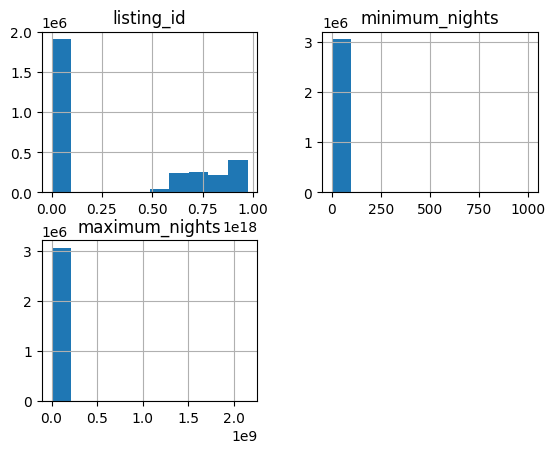

In [101]:
calender.hist()

memeriksa korelasi antar data numerik pada sebuah DataFrame dengan **corr()**

In [102]:
calender.corr()

<ipython-input-102-d74acbb57f82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  calender.corr()


,listing_id,minimum_nights,maximum_nights
listing_id,1.000000,-0.014998,-0.011748
minimum_nights,-0.014998,1.000000,-0.001718
maximum_nights,-0.011748,-0.001718,1.000000


### Explore Data Listings

Menggunakan Describe dengan include = all

In [103]:
listings.describe(include='all')

<ipython-input-103-d504954eadf8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings.describe(include='all')
<ipython-input-103-d504954eadf8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings.describe(include='all')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.386000e+03,8386,8.386000e+03,8386,8386,8386,8386,8386,8386,8.386000e+03,...,8386.0,8386.0,8386.0,8386,8386,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
unique,NaN,8386,NaN,2,2,3715,8246,4814,8307,NaN,...,104.0,118.0,144.0,7288,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/761411,NaN,2023-09-04,city scrape,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,Vanuit deze charmante accommodatie gelegen in ...,Overview not available,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,...,5.0,5.0,5.0,Exempt,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,5602,5228,296,12,3178,9,NaN,...,3719.0,2223.0,1253.0,627,6867,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.973884e+17,NaN,2.023090e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.077878e+08,...,NaN,NaN,NaN,NaN,NaN,1.831624,1.103387,0.655617,0.031958,1.116737
std,3.905819e+17,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.448316e+08,...,NaN,NaN,NaN,NaN,NaN,2.857336,1.700376,1.990898,0.381666,2.146642
min,2.818000e+03,NaN,2.023090e+13,NaN,NaN,NaN,NaN,NaN,NaN,3.159000e+03,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.851464e+07,NaN,2.023090e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.025536e+07,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.300000


Pivot table untuk memperoleh informasi terkait jumlah tempat yang ditawarkan berdasarkan kota

In [104]:
listings.groupby(by='host_location').id.nunique().sort_values(ascending=False).reset_index().head(10)

,host_location,id
0,"Amsterdam, Netherlands",7790
1,Netherlands,253
2,"London, United Kingdom",20
3,"Amstelveen, Netherlands",16
4,"Utrecht, Netherlands",15
5,"Nederland, CO",11
6,"Haarlem, Netherlands",11
7,"The Hague, Netherlands",10
8,"New York, NY",9
9,"Groningen, Netherlands",8


### Explore Data Reviews

Menggunakan Describe dengan include = all

In [105]:
review.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,3.810410e+05,3.810410e+05,381041,3.810410e+05,381041,381027
unique,NaN,NaN,4379,NaN,51654,370757
top,NaN,NaN,2023-05-21,NaN,David,.
freq,NaN,NaN,706,NaN,2536,566
mean,3.870153e+16,3.141503e+17,NaN,1.369009e+08,NaN,NaN
std,1.643068e+17,3.752851e+17,NaN,1.368669e+08,NaN,NaN
min,2.818000e+03,1.191000e+03,NaN,2.990000e+02,NaN,NaN
25%,4.295087e+06,2.514749e+08,NaN,2.865549e+07,NaN,NaN
50%,1.578052e+07,5.845232e+08,NaN,8.641518e+07,NaN,NaN
75%,3.076244e+07,6.954056e+17,NaN,2.058318e+08,NaN,NaN


Merge Tabel calender, listings dan review

In [106]:
airbnb = pd.merge(
    left=listings,
    right=review,
    how='left',
    left_on='id',
    right_on='id'
)
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,reviewer_id,reviewer_name,comments
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,2,0,2,0,2.30,NaN,NaN,NaN,NaN,NaN
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,1,1,0,0,0.64,NaN,NaN,NaN,NaN,NaN
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,3,1,2,0,2.73,NaN,NaN,NaN,NaN,NaN
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,1,1,0,0,0.11,NaN,NaN,NaN,NaN,NaN
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,2,0,2,0,6.62,NaN,NaN,NaN,NaN,NaN


In [107]:
airbnb_df = pd.merge(
    left=airbnb,
    right=calender,
    how='left',
    left_on='listing_id',
    right_on='listing_id'
)
airbnb_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,date_x,reviewer_id,reviewer_name,comments,date_y,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pivot tabel untuk informasi lama penyewaaan berdasarkan tempatnya

In [108]:
airbnb_df.groupby(by=["neighbourhood","host_response_time"]).agg({
    "listing_id": "nunique",
    "host_listings_count": "sum",
}).sort_values(by="host_listings_count", ascending=False)

,,listing_id,host_listings_count
neighbourhood,host_response_time,,
"Amsterdam, Noord-Holland, Netherlands",within an hour,0,17994
"Amsterdam, Noord-Holland, Netherland",within an hour,1,7838
"Amsterdam, Noord-Holland, Netherlands",within a few hours,0,1437
"Amsterdam, Noord-Holland, Netherland",within a few hours,0,881
"Amsterdam, North Holland, Netherlands",within an hour,0,823
...,...,...,...
"Amsterdam, NORTH HOLLAND, Netherlands",within an hour,0,1
"Amstelveen, Noord-Holland, Netherlands",within an hour,0,1
"Amsterdam, North-Holland, Netherlands",within an hour,0,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan setiap tahunnya ?

Menggunakan resample untuk memperoleh informasi terkait penyewaan

In [109]:
year_airbnb_df = airbnb_df.resample(rule='M', on='first_review').agg({
    'id':'nunique',
    "host_listings_count": "sum"
})

# year_airbnb_df['first_review']=year_airbnb_df['first_review'].dt.strftime('%Y-%m')
year_airbnb_df.index=year_airbnb_df.index.strftime('%Y')
year_airbnb_df=year_airbnb_df.groupby('first_review')['host_listings_count'].sum().reset_index()
# year_airbnb_df=year_airbnb_df.reset_index()
year_airbnb_df.rename(columns={
    "id": "order_count",
    "first_review": "year"
}, inplace=True)
year_airbnb_df.head()

,year,host_listings_count
0,2009,1
1,2010,10
2,2011,32
3,2012,121
4,2013,247


Menggunakan line chart untuk memvisualisasikan

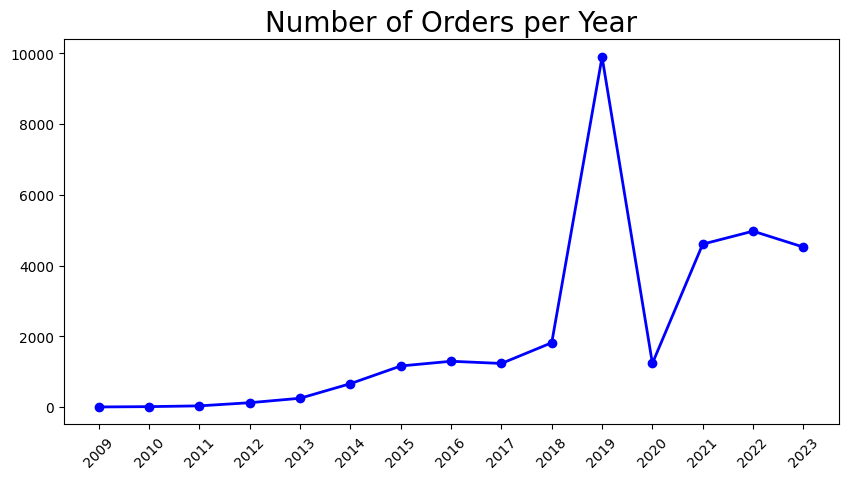

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(year_airbnb_df["year"], year_airbnb_df["host_listings_count"], marker='o', linewidth=2, color="blue")
plt.title("Number of Orders per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Wilayah mana saja yang paling diminati oleh pelanggan dalam memesan ?

Membuat sebuah DataFrame baru guna menampung informasi terkait jumlah wilayah yang diminati

In [111]:
sum_order_items_df = airbnb_df.groupby(['host_location', 'source']).size().sort_values(ascending=False).reset_index(name='count')
sum_order_items_df.head(15)

,host_location,source,count
0,"Amsterdam, Netherlands",city scrape,4863
1,"Amsterdam, Netherlands",previous scrape,2927
2,"Amstelveen, Netherlands",city scrape,375
3,Netherlands,city scrape,149
4,Netherlands,previous scrape,104
5,"London, United Kingdom",city scrape,12
6,"Utrecht, Netherlands",previous scrape,9
7,"Haarlem, Netherlands",city scrape,9
8,"London, United Kingdom",previous scrape,8
9,"New York, NY",city scrape,7


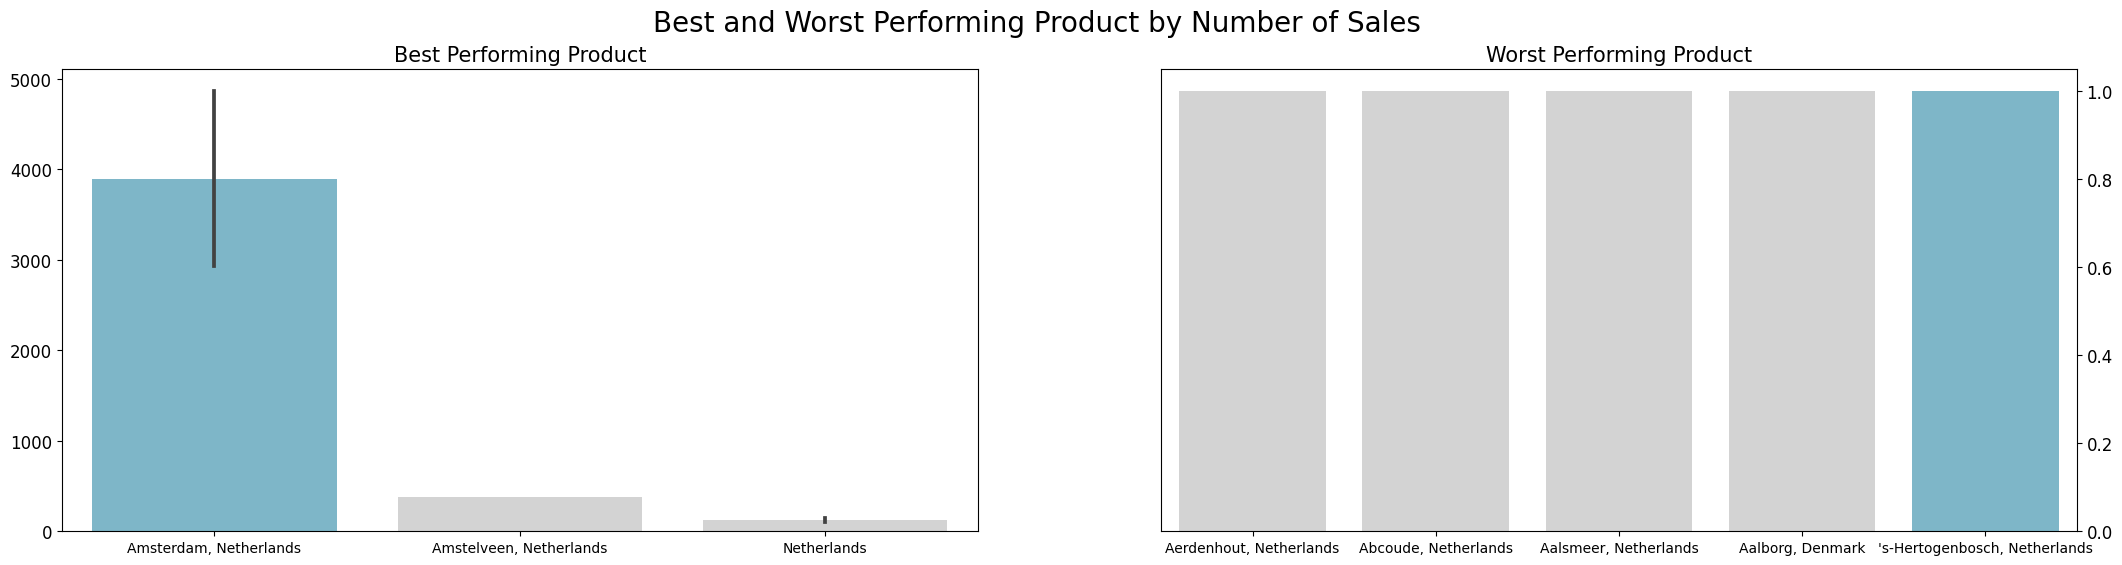

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="host_location", y="count", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="host_location", y="count", data=sum_order_items_df.sort_values(by="host_location", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## Conclusion

**Bagaimana performa penyewaan setiap tahunnya ?**
- Performa penyewaam setiap tahun sangat fluktuatif takan tetapi grafik tertinggi pada tahun 2019


**Wilayah mana saja yang paling diminati oleh pelanggan dalam memesan ?**
- Tempat yang diminati berada pada kota Amsterdam, Belanda

**Menyimpan Berkas**

In [114]:
airbnb_df.to_csv('airbnb_df.csv', index=False)